# Supervised Machine Learning

It Contain Two Problems 
1.Regression
2.Classification

## Generalized linear Model [GLM]

A Generalized Linear Model (GLM) is a flexible generalization of ordinary linear regression that allows for response variables that have error distributions other than a normal distribution. The GLM framework broadens the scope of linear models to accommodate response variables that are binary, count data, or percentages, among others.

## Linear_Regression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

1.Build a model to predict the price

In [3]:
df = pd.DataFrame({'Area': [2600,3000,3200,3600,4000],'Price': [550000,565000,610000,680000,725000]})
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
target = df[['Price']]
target

,Price
0,550000
1,565000
2,610000
3,680000
4,725000


In [5]:
features = df.drop(columns='Price')
features

,Area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
# Shuffling data 10 times with 70% of training data 30% of testing data

x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.7,random_state=10)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3, 1)
(2, 1)
(3, 1)
(2, 1)


In [8]:
print('x_Train')
print(x_train)
print('\n')
print('x_Test')
print(x_test)
print('\n')
print('y_Train')
print(y_train)
print('\n')
print('y_Test')
print(y_test)

x_Train
   Area
0  2600
4  4000
1  3000


x_Test
   Area
2  3200
3  3600


y_Train
    Price
0  550000
4  725000
1  565000


y_Test
    Price
2  610000
3  680000


In [9]:
lin_model = LinearRegression()

In [10]:
# Model Training

lin_model.fit(x_train,y_train)                   # y = b1(x) + b0

LinearRegression()

In [11]:
b1 = lin_model.coef_     # b1 = 131.7307
b1

array([[131.73076923]])

In [12]:
b0 = lin_model.intercept_       # b0 = 191794.8717
b0

array([191794.87179487])

In [13]:
# Training data through Manually done

b1*2600+b0

array([[534294.87179487]])

In [14]:
# Training Validation
# Training data through Functions

y_pred = lin_model.predict(x_train)
y_pred

array([[534294.87179487],
       [718717.94871795],
       [586987.17948718]])

In [15]:
# Test Validation
# Training data through Functions

y_pred1 = lin_model.predict(x_test)
y_pred1

array([[613333.33333333],
       [666025.64102564]])

In [16]:
from sklearn.metrics import r2_score

In [17]:
# Training Accuracy

r2_score(y_train,y_pred)

0.9591026776589222

In [18]:
# Testing Accuracy

r2_score(y_test,y_pred1)

0.9157576245488329

## Multiple_Linear_Regression

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

2.Build a model to predict the house price

In [21]:
df = pd.read_csv('homes.csv')
df.head()

,"""LivingArea""","""Rooms""","""Bedrooms""","""Bathrooms""","""Age""","""Acres""","""Price"""
0,28,10,5,3,60,0.28,31670
1,18,8,4,1,12,0.43,40330
2,13,6,3,1,41,0.33,14710
3,17,7,3,1,22,0.46,32040
4,25,8,4,3,5,2.05,36130


In [22]:
df.shape

(50, 7)

In [23]:
# Finding the missing values

df.isnull().sum()

"LivingArea"    0
"Rooms"         0
"Bedrooms"      0
"Bathrooms"     0
"Age"           0
"Acres"         0
"Price"         0
dtype: int64

In [24]:
# Finding the duplicated values

df.duplicated().any()

False

In [25]:
print(df.columns)

Index([' "LivingArea"', ' "Rooms"', ' "Bedrooms"', ' "Bathrooms"', ' "Age"',
       ' "Acres"', ' "Price"'],
      dtype='object')


In [26]:
target = df[[' "Price"']]
target.head()

,"""Price"""
0,31670
1,40330
2,14710
3,32040
4,36130


In [27]:
features = df.drop(columns=' "Price"')
features.head()

,"""LivingArea""","""Rooms""","""Bedrooms""","""Bathrooms""","""Age""","""Acres"""
0,28,10,5,3,60,0.28
1,18,8,4,1,12,0.43
2,13,6,3,1,41,0.33
3,17,7,3,1,22,0.46
4,25,8,4,3,5,2.05


In [47]:
# Scaling

from sklearn.preprocessing import StandardScaler

In [48]:
std_sca = StandardScaler()
features = pd.DataFrame(std_sca.fit_transform(features),columns=features.columns)
features.head()

,"""LivingArea""","""Rooms""","""Bedrooms""","""Bathrooms""","""Age""","""Acres"""
0,0.832210,1.525904,1.725618,1.522845,0.971579,-0.627882
1,-0.377398,-0.047193,0.263230,-1.148813,-0.594432,-0.500712
2,-0.982202,-1.620290,-1.199159,-1.148813,0.351700,-0.585492
3,-0.498359,-0.833742,-1.199159,-1.148813,-0.268179,-0.475278
4,0.469328,-0.047193,0.263230,1.522845,-0.822808,0.872727


In [100]:
# Shuffling data 100 times with 85% of training data 15% of testing data

x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=100)

In [101]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 6)
(10, 6)
(40, 1)
(10, 1)


In [102]:
print('x_Train')
print(x_train.head())
print('\n')
print('x_Test')
print(x_test.head())
print('\n')
print('y_Train')
print(y_train.head())
print('\n')
print('y_Test')
print(y_test.head())

x_Train
    "LivingArea"   "Rooms"  "Bedrooms"  "Bathrooms"     "Age"   "Acres"
0       0.832210  1.525904    1.725618     1.522845  0.971579 -0.627882
11     -0.619319 -0.833742   -1.199159    -1.148813  0.645327 -0.314195
18     -0.498359 -0.833742   -1.199159     0.187016 -0.561806 -0.560058
45     -1.345084 -1.620290   -1.199159    -1.148813 -0.496556 -0.017465
38      1.799897  1.525904    3.188007     1.522845  0.090698  0.152096


x_Test
    "LivingArea"   "Rooms"  "Bedrooms"  "Bathrooms"     "Age"   "Acres"
6      -0.135476 -0.047193    0.263230     1.522845 -0.398680  2.525941
36      0.348367  1.525904   -1.199159     0.187016  0.090698 -0.382020
37     -0.135476 -0.047193    0.263230    -1.148813  1.134705 -0.526146
28      5.186800  2.312453    0.263230     2.858675 -0.855433 -0.144635
43      2.162779  3.099002    1.725618     1.522845  5.604362  2.771803


y_Train
    "Price"
0     31670
11    14450
18    36480
45    24380
38    58530


y_Test
    "Price"
6     31310
36  

In [103]:
lin_model = LinearRegression()

In [104]:
# Model Training

lin_model.fit(x_train,y_train)                   # y = b1(x) + b0

LinearRegression()

In [105]:
'''b1 = lin_model.coef_     # b1 = 131.7307
b1'''

'b1 = lin_model.coef_     # b1 = 131.7307\nb1'

In [106]:
'''b0 = lin_model.intercept_       # b0 = 191794.8717
b0'''

'b0 = lin_model.intercept_       # b0 = 191794.8717\nb0'

In [107]:
# Training Validation
# Training data through Functions

'''y_pred = lin_model.predict(x_train)
y_pred'''

'y_pred = lin_model.predict(x_train)\ny_pred'

In [108]:
# Test Validation
# Training data through Functions

y_pred1= lin_model.predict(x_test)

In [109]:
# Training Accuracy

'''r2_score(y_train,y_pred)'''

'r2_score(y_train,y_pred)'

In [127]:
# Testing Accuracy

r_sqr = r2_score(y_test,y_pred1)
r_sqr

-8.40493426241467

<Axes: xlabel=' "Price"'>

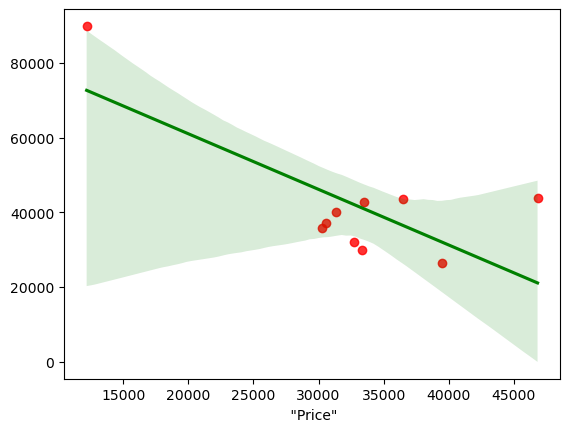

In [111]:
sns.regplot(data=df,x=y_test,y=y_pred1,scatter_kws={'color':'Red'},line_kws={'color':'Green'})

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [124]:
MAE = np.round(mean_absolute_error(y_test,y_pred1))
MAE

13509.0

In [125]:
MSE = np.round(mean_squared_error(y_test,y_pred1))
MSE

652151259.0

In [121]:
#MAPE = mean_absolute_percentage_error(y_test,y_pred1)
#MAPE

In [130]:
N = 1047
K = 6
adj_r_sqr = 1-((1-r_sqr)*(N-1)) / (N-K-1)
adj_r_sqr

-8.459193498543986